In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

Data are MC generated to simulate registration of high energy gamma particles in an atmospheric Cherenkov telescope

Multivariate, Physical Science Classification, Real, 19020 Instances, 11 attributes

Bock,R.. (2007). MAGIC Gamma Telescope. UCI Machine Learning Repository. https://doi.org/10.24432/C52C8B.

The data set was generated by a Monte Carlo program, Corsika, described in:
    D. Heck et al., CORSIKA, A Monte Carlo code to simulate extensive air showers,
    Forschungszentrum Karlsruhe FZKA 6019 (1998).
http://rexa.info/paper?id=ac6e674e9af20979b23d3ed4521f1570765e8d68

The program was run with parameters allowing to observe events with energies down to below 50 GeV.

In [10]:
cols = ["fLength", "fWidth", "fSize", "fConc", "fConc1", "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "class"]
df = pd.read_csv("magic04.data", names=cols)
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


features passed into model to predict class [supervised learning]

classification: predict g for gamma, h for hadron

In [11]:
df["class"] = (df["class"] == "g").astype(int)

In [12]:
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


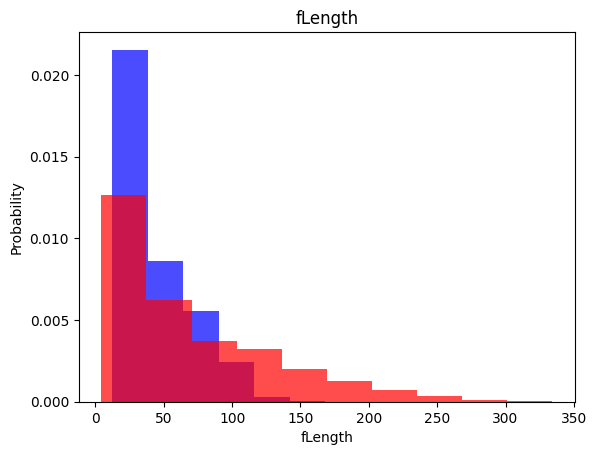

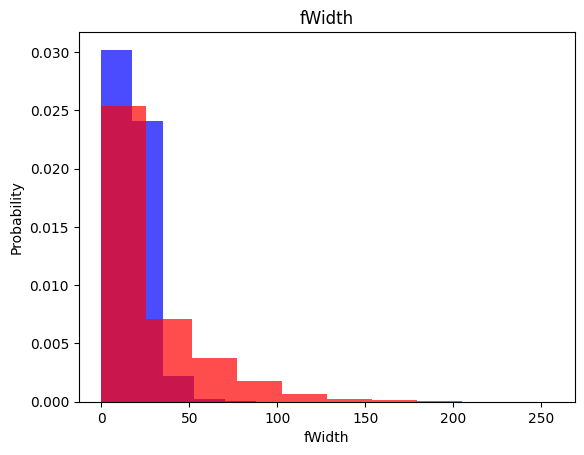

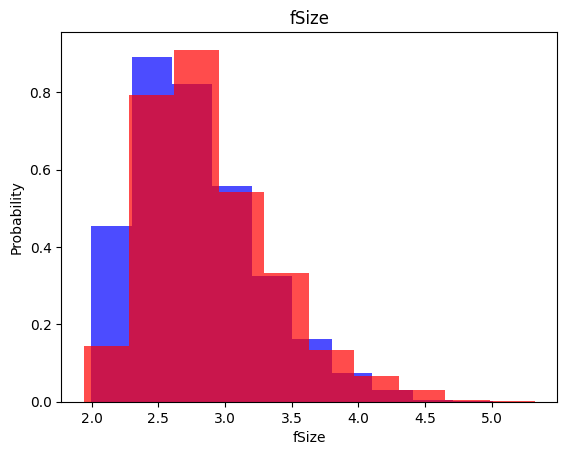

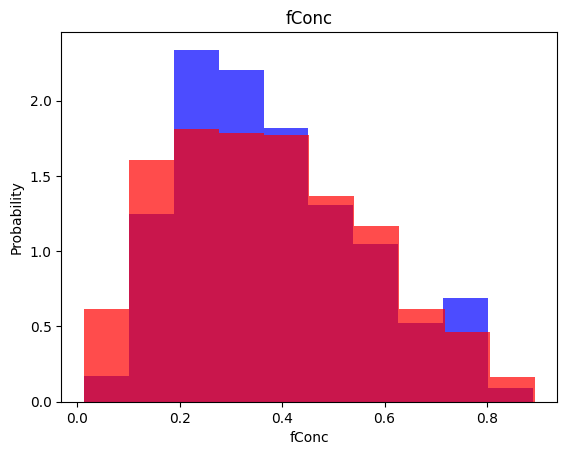

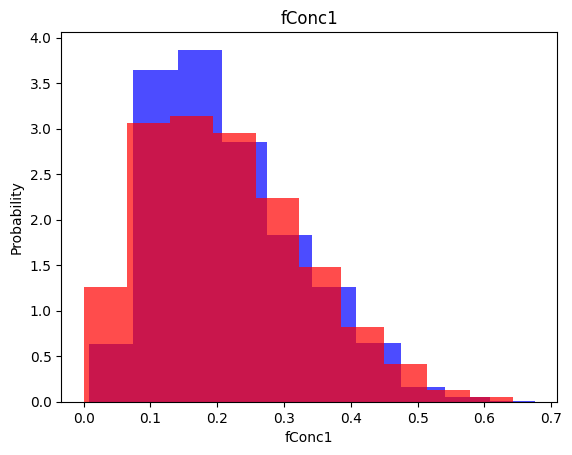

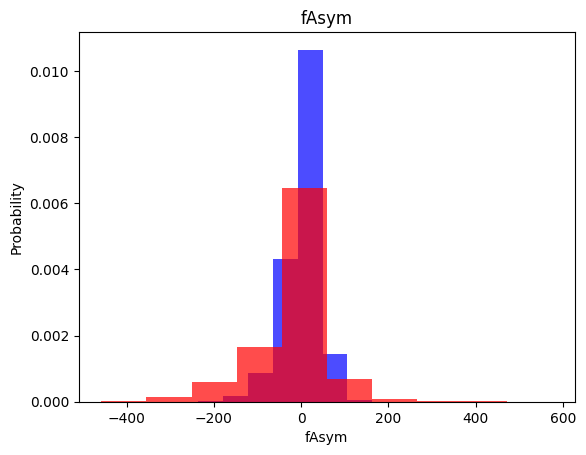

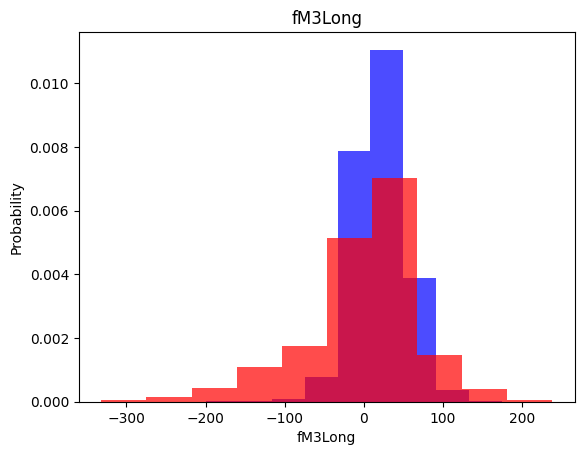

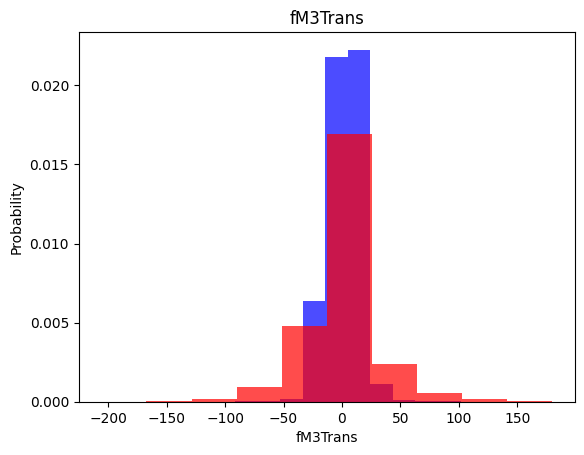

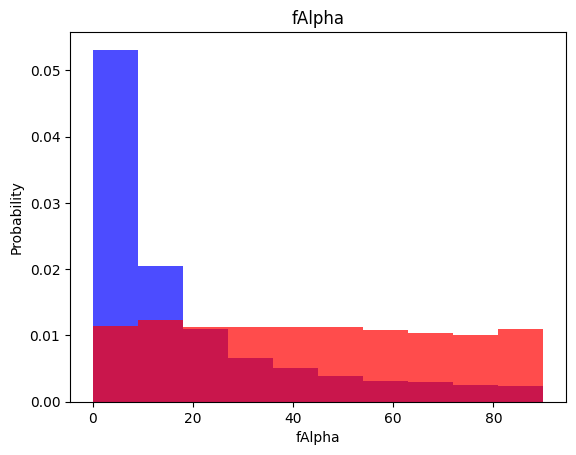

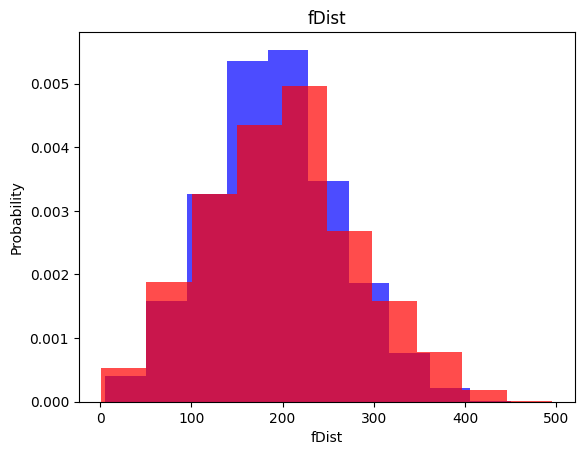

In [13]:
for label in cols[:-1] :
    plt.hist(df[df["class"] == 1][label], color="blue", label="gamma", alpha = 0.7, density=True)
    plt.hist(df[df["class"] == 0][label], color="red", label="hadron", alpha = 0.7, density=True)
    plt.title(label)
    plt.ylabel("Probability")
    plt.xlabel(label)
    plt.show()


# Train, Validation, Test datasets

In [14]:
#splitting dataframe into train, validation and test sets
#shuffle and then split to 60% train, 20% validation, 20% test
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

In [15]:
def scale_dataset(dataframe, oversample =False):
    X = dataframe[dataframe.columns[:-1]].values
    y = dataframe[dataframe.columns[-1]].values

    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    
    if oversample:
        ros = RandomOverSampler()
        X, y = ros.fit_resample(X, y)
    
    data = np.hstack((X, np.reshape(y, (-1, 1))))

    return data, X, y

In [16]:
train, X_train, y_train = scale_dataset(train, oversample=True)
valid, X_valid, y_valid = scale_dataset(valid, oversample=False)
test, X_test, y_test = scale_dataset(test, oversample=False)

In [17]:
len(y_train)

14798

# kNN

In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report 

In [85]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [86]:
y_pred = knn_model.predict(X_test)

In [87]:
y_pred

array([0, 1, 1, ..., 1, 1, 1])

In [88]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.73      0.73      1344
           1       0.85      0.86      0.85      2460

    accuracy                           0.81      3804
   macro avg       0.79      0.79      0.79      3804
weighted avg       0.81      0.81      0.81      3804



# Naive Bayes

In [18]:
from sklearn.naive_bayes import GaussianNB

In [19]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train) 


GaussianNB()

In [22]:
y_pred = nb_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.64      0.41      0.50      1303
           1       0.74      0.88      0.80      2501

    accuracy                           0.72      3804
   macro avg       0.69      0.64      0.65      3804
weighted avg       0.70      0.72      0.70      3804



# Log Regression

In [23]:
from sklearn.linear_model import LogisticRegression

In [25]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(X_train, y_train)

In [26]:
y_pred = lg_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.65      0.71      0.68      1303
           1       0.84      0.80      0.82      2501

    accuracy                           0.77      3804
   macro avg       0.75      0.76      0.75      3804
weighted avg       0.78      0.77      0.77      3804

